# 聚类分析

## 1 层次聚类法

### 1.1 Q 型聚类分析

Q 型聚类分析使用数量化的方法对事物进行分类。每个样本点由多变量刻画，看做 $R^n$ 空间的一个点，使用距离度量样本点间的相似程度。

#### 1.1.1 样本点间的距离
$x, y$ 为 $R^n$ 空间中两个样本点，定义 $d: (R^n, R^n)\rightarrow R$，常见定义如下：
* 闵氏距离: 
  
  $$
  d_q(x, y)=\left[\sum_{k=1}^p|x_k-y_k|^q\right]^\frac{1}{q}
  $$
  
  * q = 1: 绝对值距离（cityblock）
  
    $$
    d_1(x, y) = \sum_{k=1}^p|x_k-y_k|
    $$
    
  * q = 2: 欧几里得距离（euclidean）
    
    $$
    d_2(x, y) = \left(\sum_{k=1}^p|x_k-y_k|\right)^\frac{1}{2}
    $$
    
  * q = $\infty$: 切比雪夫距离（chebychev）
    
    $$
    d_\infty(x, y)=\max\limits_{1\leq k\leq p} |x_k-y_k|
    $$
    
* 马氏距离（mahalanobis）
  
  $$
  d(x, y)=\sqrt{(x-y)^T\Sigma^{-1}(x-y)}
  $$
  
  其中 $\Sigma$ 为总体样本 $Z$ 的协方差矩阵，$x, y\in Z$。马氏距离对一切线性变换不变，不受量纲影响

#### 1.1.2 类与类之间相似性度量

对于两个样本类 $G_1$ 和 $G_2$，可使用下列方法度量距离

* 最短距离法（single）
  
  $$
  D(G_1, G_2)=\min\limits_{x_i\in G_1, y_j\in G_2}\{d(x_i, y_i)\}
  $$
  
* 最长距离法（complete）
  
  $$
  D(G_1, G_2)=\max\limits_{x_i\in G_1, y_j\in G_2}\{d(x_i, y_i)\}
  $$
  
* 重心法（centroid）
  
  $$
  D(G_1, G_2)=d(\bar{x}, \bar{y})
  $$
  
  其中 $\bar{x}, \bar{y}$ 分别为 $G_1, G_2$ 的重心
  
* 类平均法（average）
  
  $$
  D(G_1, G_2)=\frac{1}{n_1n_2}\sum_{x_i\in G_1}\sum_{x_j\in G_2}d(x_i, x_j)
  $$
  
* 离差平方和法（ward）

  又称ward法，不常用且公式复杂，略

### 1.2 R 型聚类分析法

Q 型聚类常用于对变量（对象）进行聚类，而 R 型聚类常用于对变量的指标进行分析，以消除冗余或高相似度的指标。

#### 1.2.1 变量相似性度量

* 相关系数
  
  $$
  r_{ij}=\frac{\sum(x_j-\bar{x_j})\cdot(x_i-\bar{x_i})}{||x_j-\bar{x_j}||_2\cdot||x_i-\bar{x_i}||_2}
  $$
  
* 夹角余弦.
  
  $$
  r_{ij}=\frac{\sum x_i\cdot x_j}{|x_i|\cdot|x_j|}
  $$

#### 1.2.2 变量聚类法

令 $d_{ij}=1 - |r_{ij}|$ 或 $d_{ij}=1-r_{ij}^2$

* 最短距离法（single）
  
  $$
  D(G_1, G_2)=\min\limits_{x_i\in G_1, y_j\in G_2}\{d(x_i, y_i)\}
  $$
  
* 最长距离法（complete）
  
  $$
  D(G_1, G_2)=\max\limits_{x_i\in G_1, y_j\in G_2}\{d(x_i, y_i)\}
  $$
  

### 1.3 算法过程

层次聚类法的算法过程很简单。初始情况下每个样本单独作为一个类，随后依次合并样本相似度最近的两个类，直到所有的类都归为一个类。

### 1.4 编程实例

给定表格，每一列为教育指标，从第 0 列到第 9 列分别表示："每百万人口高等院校数", "每10万人口高等院校毕业生数", "每10万人口高等院校招生数", "每10万人口高等院校在校生数", "每10万人口高等院校教职工数", "每10万人口高等院校专职教师数", "高级职称占专职教师的比例", "平均每所高等院校的在校生数", "国家财政预算内普通高教经费占国内生产总值的比例", "生均教育经费"。

每一行为省份或直辖市，从第 0 行到第 29 行分别表示："北京","上海","天津","陕西","辽宁","吉林","黑龙江","湖北","江苏","广东","四川","山东","甘肃","湖南","浙江","新疆","福建","山西","河北","安徽","云南","江西","海南","内蒙古","西藏","河南","广西","宁夏","贵州","青海"

运用 Q 型聚类和 R 型聚类方法对我国各地区普通高等教育的发展状况进行分析。

In [1]:
# R 型聚类以及 Q 型聚类，并绘制聚类图
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from matplotlib import pyplot as pl
from sklearn.preprocessing import StandardScaler

In [2]:
edu = ['每百万人口高等院校数', "每10万人口高等院校毕业生数", "每10万人口高等院校招生数", "每10万人口高等院校在校生数", "每10万人口高等院校教职工数", "每10万人口高等院校专职教师数", "高级职称占专职教师的比例", "平均每所高等院校的在校生数", "国家财政预算内普通高教经费占国内生产总值的比例", "生均教育经费"]
loc = ["北京","上海","天津","陕西","辽宁","吉林","黑龙江","湖北","江苏","广东","四川","山东","甘肃","湖南","浙江","新疆","福建","山西","河北","安徽","云南","江西","海南","内蒙古","西藏","河南","广西","宁夏","贵州","青海"]
print(len(edu), len(loc))

10 30


In [3]:
# 读入数据
data = np.loadtxt("./data/gj.txt", delimiter="\t")

In [4]:
# R 型聚类
# 标准化并计算相关系数矩阵
edu_data = StandardScaler().fit_transform(data) # 对每一列进行标准化
r = np.corrcoef(data.T) # 计算每一列的相关系数，r[i][j] 表示第 i 列与第 j 列向量的相关系数
r

array([[1.        , 0.94338181, 0.95281567, 0.95910886, 0.9745946 ,
        0.9797731 , 0.40654255, 0.06629054, 0.86799257, 0.66087087],
       [0.94338181, 1.        , 0.99461357, 0.99456226, 0.97432587,
        0.97017576, 0.61360479, 0.34997083, 0.80394597, 0.59978889],
       [0.95281567, 0.99461357, 1.        , 0.99865437, 0.98305036,
        0.98070486, 0.62608928, 0.34448786, 0.82307655, 0.61713964],
       [0.95910886, 0.99456226, 0.99865437, 1.        , 0.98781551,
        0.98559415, 0.60958398, 0.32563996, 0.82761984, 0.61242195],
       [0.9745946 , 0.97432587, 0.98305036, 0.98781551, 1.        ,
        0.99858775, 0.5598757 , 0.24113604, 0.85897423, 0.61737743],
       [0.9797731 , 0.97017576, 0.98070486, 0.98559415, 0.99858775,
        1.        , 0.55001311, 0.22220438, 0.86912939, 0.61642173],
       [0.40654255, 0.61360479, 0.62608928, 0.60958398, 0.5598757 ,
        0.55001311, 1.        , 0.77886469, 0.36554389, 0.15102641],
       [0.06629054, 0.34997083, 0.3444878

从数据中可以看出，存在较为接近的教育指标，故对教育指标进行聚类分析

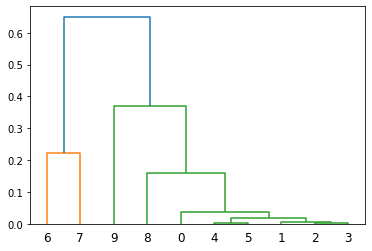

In [5]:
# 计算相关系数导出的矩阵，d[i][j] 表示第 i 列到第 j 列向量的相似性
d = pdist(edu_data.T, 'correlation')
z = linkage(d, 'average') # 进行分层聚类
# 绘制聚类图
dn = dendrogram(z)

In [6]:
from scipy.cluster.hierarchy import fcluster
T = fcluster(z, 6, criterion='maxclust')
for k in range(1, 7):
    cls = zip((i for i, v in enumerate(T) if v == k), (edu[i] for i, v in enumerate(T) if v == k))
    print(f"第{k}类的有：", list(cls))

第1类的有： [(6, '高级职称占专职教师的比例')]
第2类的有： [(7, '平均每所高等院校的在校生数')]
第3类的有： [(1, '每10万人口高等院校毕业生数'), (2, '每10万人口高等院校招生数'), (3, '每10万人口高等院校在校生数'), (4, '每10万人口高等院校教职工数'), (5, '每10万人口高等院校专职教师数')]
第4类的有： [(0, '每百万人口高等院校数')]
第5类的有： [(8, '国家财政预算内普通高教经费占国内生产总值的比例')]
第6类的有： [(9, '生均教育经费')]


通过 R 型聚类发现，第 1, 2, 3, 4, 5 所代表的数据相似度较高，而在现实中其也刚好代表了学校规模，故其归为一类。因此可将 10 个教育指标划分为 6 类，分别以序号为 0, 1, 6, 7, 8, 9 的指标来进行代表。

接着使用相似度较低的 6 个教育指标来对不同地区的教育情况进行 Q 型聚类分析。

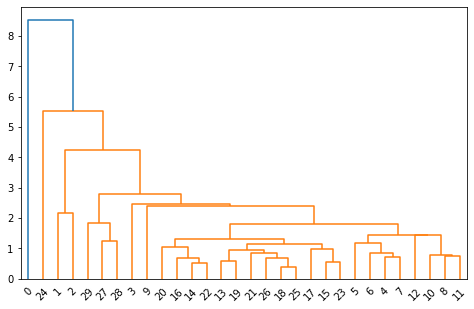

In [7]:
# 使用具有代表性的 6 个教育指标
loc_data = data[:, [0, 1, 6, 7, 8, 9]]
loc_data = StandardScaler().fit_transform(loc_data)  # z-score 标准化

# 绘制聚类图
import matplotlib.pyplot as plt
y = pdist(loc_data, 'euclidean')# 求对象的欧氏距离
z = linkage(y, 'average')
plt.figure(figsize=(8, 5))
h = dendrogram(z)

In [8]:
# 对不同的聚类情况进行分析
for k in range(3, 6):
    print(f"划分成{k}类的结果如下：")
    T = fcluster(z, k, 'maxclust')
    for i in range(1, k+1):
        print(f"第{i}类的有：", [loc[j] for j, v in enumerate(T) if v == i])
    if k < 5:
        print("***************************************")

划分成3类的结果如下：
第1类的有： ['上海', '天津', '陕西', '辽宁', '吉林', '黑龙江', '湖北', '江苏', '广东', '四川', '山东', '甘肃', '湖南', '浙江', '新疆', '福建', '山西', '河北', '安徽', '云南', '江西', '海南', '内蒙古', '河南', '广西', '宁夏', '贵州', '青海']
第2类的有： ['西藏']
第3类的有： ['北京']
***************************************
划分成4类的结果如下：
第1类的有： ['上海', '天津']
第2类的有： ['陕西', '辽宁', '吉林', '黑龙江', '湖北', '江苏', '广东', '四川', '山东', '甘肃', '湖南', '浙江', '新疆', '福建', '山西', '河北', '安徽', '云南', '江西', '海南', '内蒙古', '河南', '广西', '宁夏', '贵州', '青海']
第3类的有： ['西藏']
第4类的有： ['北京']
***************************************
划分成5类的结果如下：
第1类的有： ['上海', '天津']
第2类的有： ['宁夏', '贵州', '青海']
第3类的有： ['陕西', '辽宁', '吉林', '黑龙江', '湖北', '江苏', '广东', '四川', '山东', '甘肃', '湖南', '浙江', '新疆', '福建', '山西', '河北', '安徽', '云南', '江西', '海南', '内蒙古', '河南', '广西']
第4类的有： ['西藏']
第5类的有： ['北京']


可以发现，当划分为 5 类时，其所划分成的类分别有：北京一类；西藏一类；上海、天津一类；其他一类。北京为首都，西藏采用独特的民族政策，宁夏贵州青海为较不发达且为少数民族聚集地，以及其他省份，因此可以解释上述结果。

## 2 K-means 聚类方法

### 2.1 算法原理

1. 手动选择 k 个中心点
2. 遍历每一个样本点，选择距离其最近的中心点 $C_i$，并将其划分为第 $i$ 类
3. 计算每一类新的中心点 $C_i, i=1, 2, \cdots, k$
4. 遍历每一个样本点，选择距离其最近的中心点 $C_i$，并将其划分为第 $i$ 类
5. 判断聚类是否发生改动，若改动跳转至3，否则结束迭代

### 2.2 算法实现

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics
import matplotlib.pyplot as plt

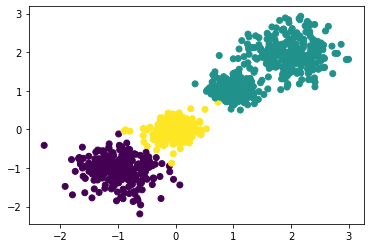

[1 1 0 2 1 0 1 1 1 2 1 2 1 1 0 2 1 1 1 0 1 1 0 1 1 1 1 2 0 0]
[1 1 0 2 1 0 1 1 1 2]
[[-0.98579917 -1.04421422]
 [ 1.4925044   1.49887711]
 [-0.03211515 -0.01417351]]
415.8116737568961
0.5758167373145309


In [10]:
# 生成随机数据
x,y = make_blobs(n_samples=1000,n_features=4,centers=[[-1,-1],[0,0],[1,1],[2,2]],cluster_std=[0.4,0.2,0.2,0.4],random_state=10)

# 聚类分析
k_means = KMeans(n_clusters=3, random_state=10, init="k-means++", n_init=20) # 初始化分析器
k_means.fit(x) # 分析

# 绘图
y_predict = k_means.predict(x)
plt.scatter(x[:,0],x[:,1],c=y_predict)
plt.show()

# 输出聚类预测结果，前 10 个样本所属类，类的中心，聚合评估标准
print(k_means.predict((x[:30,:])))
print(k_means.labels_[:10])
print(k_means.cluster_centers_)
print(k_means.inertia_) # 每点到其所属族中心的距离平方和，越小越好
print(metrics.silhouette_score(x,y_predict)) # 评估系数，越小越好

### 手肘法寻找最佳 k 值
K-means 方法存在核心指标，SSE(Sum of The Squared Errors)

$$
\text{SSE}=\sum_{i=1}^k\sum_{p\in C_i}|p-m_i|^2
$$

> 当k小于真实聚类数时，由于k的增大会大幅增加每个簇的聚合程度，故SSE的下降幅度会很大，而当k到达真实聚类数时，再增加k所得到的聚合程度回报会迅速变小，所以SSE的下降幅度会骤减，然后随着k值的继续增大而趋于平缓，也就是说SSE和k的关系图是一个手肘的形状，而这个肘部对应的k值就是数据的真实聚类数
作者：小歪与大白兔
链接：https://www.jianshu.com/p/335b376174d4

故可以通过寻找肘点的方法寻找最佳 k 值

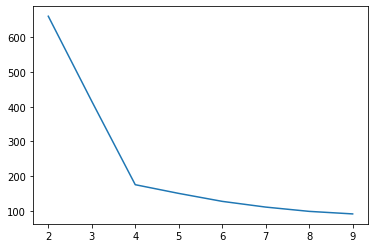

In [11]:
# 寻找最佳 k 值（肘点）
k_list = list(range(2, 10))
kms = [KMeans(n_clusters=k, init="k-means++") for k in k_list]
k_score = [v.fit(x).inertia_ for v in kms] # 得到 k 值对应的 SSE
plt.plot(k_list, k_score)

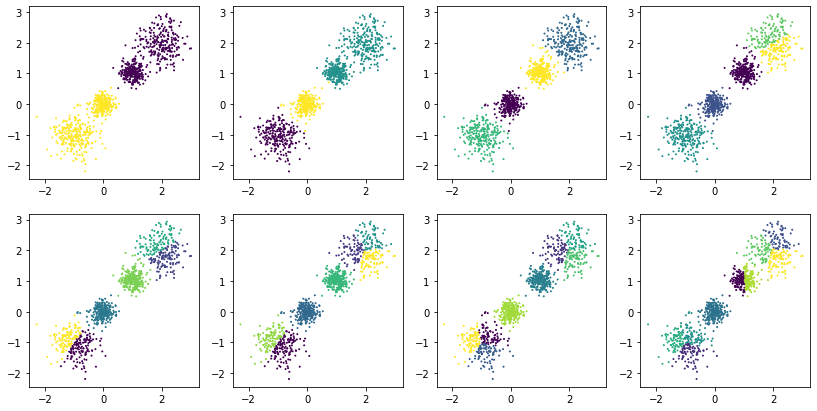

In [12]:
# 绘图
plt.figure(figsize=(14, 7))
for i in range(len(kms)):
    y_predict = kms[i].predict(x)
    plt.subplot(int(f'24{i+1}'))
    plt.scatter(x[:, 0], x[:, 1], c=y_predict, s=1)
plt.show()

显然，当 k=4 时结果最佳